# Esercizi di ricapitolazione

1. in un prato cadono 25mm di pioggia, che vengono misurati con un pluviometro che ha una base di 10cm$^2$. Calcolare la varianza e la deviazione standard della misura, assumendo che le gocce di pioggia abbiano tutte un volume di 0.1ml[*]

$[*]$ [Rain drop size and speed of a falling rain drop](https://www.baranidesign.com/faq-articles/2020/1/19/rain-drop-size-and-speed-of-a-falling-rain-drop)

**Soluzione:**

Il volume dell'acqua è 25cm$^3$. Il volume di una goccia 0.1cm$^3$. Quindi ci sono 250 gocce.
Le gocce sono distribuite secondo una distribuzione di Poisson e **assumiamo** che il parametro della Poissoniana $\nu$ sia 250, quindi la varianza sarà 250 e la dev. standard 16. Quindi l'errore relativo è 16/250=0.063. L'errore è quindi 1.6mm circa.

2. in Italia ci sono 50.701.722 persone vaccinate con almeno due dosi contro il Sars-Cov-2 su una popolazione di circa 59.816.673 abitanti. Il 56% delle persone in terapia intensiva è vaccinata con almeno due disi. Calcolare il rischio relativo di andare in terapia infettiva per vaccinati e non.

**Soluzione:**

* Il numero (atteso) di non vaccinati in t.i. è $n_0=P_0\cdot (59.816.673-50.701.722)=P_0\cdot 9.114.951$
* Il numero (atteso) di vaccinati in t.i. è $n_1=P_1\cdot 50.701.722$
* Il rapporto $r=n_0/n_1=P_0/P_1\cdot 9.114.951/50.701.722 = P_0/P_1\cdot 0.1798$
* $r=44/56=0.7857$
* Quindi $P_0/P_1 = r/0.1798 = 0.7857/0.1798=4.37$

3. un campo di calcio regolamentare in una zona di guerra misura 105$\times$68m$^2$, ed è noto che nasconde nel suo sottosuolo un bunker di circa 100m$^2$. L'aviazione sa che per distriggere il bunker deve essere colpito da almeno tre missili. Calcolare quanti missili vanno lanciati sul campo di calcio in modo da avere almeno il 90% di probabilità di distruggere il bunker. Per semplicità si considerino le aree di impatto dei missili come puntiformi, anche se questa ipotesi è chiaramente irrealistica.

**Soluzione:**
* L'area del campo di calcio vale 7140m$^2$
* La probabilità di cogliere il bunker vale 100/7140=1.4%
* La distribuzione del numero di missili che coglie il bersagio segue una distribuzione Binomiale con probabilità $p=$0.014

379 0.9006336824010466


Text(0, 0.5, 'prob.')

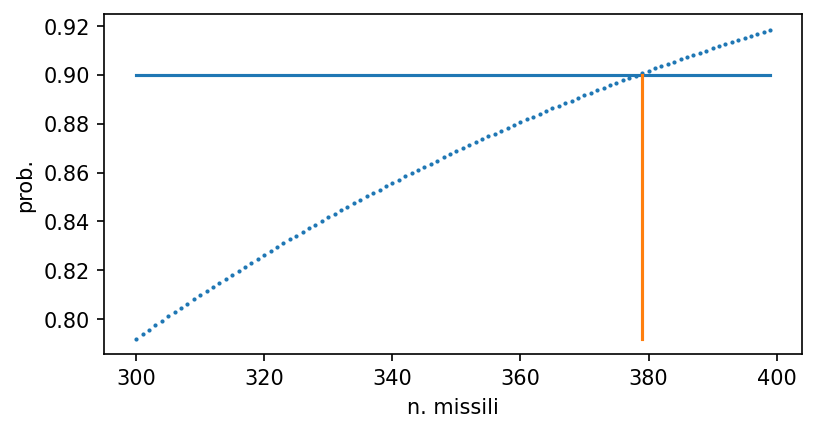

In [28]:
from scipy.stats import binom
import matplotlib.pyplot as plt
p = 100/7140 # prob. di cogliere il bunker
prob = []
nm = list(range(300,400))
nx = 0
for n in nm: # n. di missili
    prob.append(1-binom.cdf(2,n,p))
    if nx == 0 and prob[-1]>0.9:
        nx = n
        print(n, prob[-1])
plt.figure(figsize=(6,3), dpi=150)
plt.scatter(nm, prob,s=1)
plt.plot((nm[0],nm[-1]), (0.9, 0.9))
plt.plot((nx, nx), (prob[0], 0.9))
plt.xlabel('n. missili')
plt.ylabel('prob.')

4. In una città gli autobus partono ad orari a caso anziché secondo un orario regolare. In un'ora passano 3 autobus, in media. Calcolare la probabilità entro 5 minuti successivi al passaggio di un autobus ne passi almeno un altro.

**Soluzione:**

* Approssimo la distribuzione del numero di bus in un intervallo di tempo piccolo come poissoniana.
* In 5 minuti ci aspettiamo in media $\nu=$0.25 bus
* La probabilità che ne passi almeno uno è $1-P(0;\nu)=1-e^{-\nu}=$0.221.

5. si vuole misurare l'efficienza di un rivelatore contando le particelle che vengono rivelate. Assumendo che l'efficienza sia vicina al 90%, calcolare quante particelle vanno acquisite in modo da avere una incertezza sulla misura intorno all'1%.

**Soluzione:**

* Acquisisco $N$ particelle
* Di $N$ ne rivelo $n<N$, che seguono una distribuzione binomiale
* devo stimare l'efficienza: $\varepsilon=n/N$
* se il parametro della binomiale fosse $\varepsilon$, la deviazione standard di $n$ è $\sqrt{N\varepsilon(1-\varepsilon)}$
* la varianza di $\varepsilon$ è $\displaystyle\frac{\sqrt{N\varepsilon(1-\varepsilon)}}{N} =
\sqrt{\frac{\varepsilon(1-\varepsilon)}{N}}$
* se $\displaystyle \sqrt{\frac{\varepsilon(1-\varepsilon)}{N}} = 0.01$, deve essere:
$\displaystyle \frac{\varepsilon(1-\varepsilon)}{N} = 10^{-4} = \frac{0.09}{N}$ da cui
$N = 0.09\times 10^{4}=900$

6. si vuole misurare l'intensità dei fasci di un collider di elettroni e positroni[*] contando in numero di coppie elettrone-positrone prodotti attravreso un rivelatore posto a piccolo angolo. In un anno vengono acquisti 123456 eventi di questo tipo. Calcolare l'incertezza relativa nella misura di intensità.

$[*]$ tecnicamente, questa si chiama misura di *luminosità integrata*

**Soluzione:**
* L'intensità si misurà come $K\cdot n$ dove $n=123456$.
* $n$ segue una distribuzione di Poisson
* La deviazione standard di $n$ è $\sqrt{n}=\sqrt{123456}=351.4$
* L'inc. relativa è $n$ diviso la sua deviazione standard, quindi $1/\sqrt{n}$ pari a, 2.8 per mille circa.

7. attualmente, in Italia 1.200.000 persone sono infette (e in isolamneto) da Covid-19. Si assuma che altrettante persone sono infette e circolino tranquillamente senza sapere di essere infetti. In un treno ci sono 200 persone. Trovare la probabilità che almeno 4 siano infette.

**Soluzione:**
* Il numero di infetti sul treno segue una distribuzione Poisson con numero atteso pari a $200\cdot 1.200.000/(59.816.673-1.200.000) = 4.094$
* La probabilità di averne almeno 4 è 1-c.d.f(3,4.094)

In [30]:
from scipy.stats import poisson
p = 1-poisson.cdf(3,4.094)
print(p)

0.5846753345062986


8. In un rivelatore posto in un esperimento su un acceleratore passano circa 100 particelle in media per ogni collissione registrata. Considerando che il sistema di acquisizione riesce ad acquisire segnali di 150 particelle contemporaneamente, al massimo, calcolare la frazione di collisioni per la quale il sistema di aquisizione va in "saturazione"

$[*]$ questa frazione si chiama tecnicamente frazione di *tempo morto*.

In [31]:
from scipy.stats import poisson
p = 1-poisson.cdf(149,100)
print(p)

1.8842104659855252e-06
